
# **Exploratory Data Analysis on IT Salary Survey for the European Union 2020**



## Importing Packages

In [ ]:
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Reading data to Pandas Dataframes

In [ ]:
df1= pd.read_csv("C:/Users/Admin 21/Downloads/LUX BOOTCAMP/IT Salary Survey EU  2020.csv")
df1.head(2)


: 

## Inspecting Columns and Renaming to Short and  Uniform Column Names

In [ ]:
df1.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [ ]:
df1.rename(columns=
    {'Timestamp': 'date',
    'Age':'age',
    'Gender':'gender', 
    'City':'city', 
    'Position ':'position',
    'Total years of experience':'experience', 
    'Years of experience in Germany':'experience_germany',
    'Seniority level':'employee_level', 
    'Your main technology / programming language':'programming_lang',
    'Other technologies/programming languages you use often':'other_prog',
    'Yearly brutto salary (without bonus and stocks) in EUR':'basic_salary',
    'Yearly bonus + stocks in EUR':'employment_benefits',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'basic_salary_prev',
    'Annual bonus+stocks one year ago. Only answer if staying in same country':'employment_benefits_prev',
    'Number of vacation days':'vacation_days',
    'Employment status':'employment_status',
    'Сontract duration':'contract_type',
    'Main language at work':'language', 
    'Company size':'company_size', 
    'Company type':'company_type',
    'Have you lost your job due to the coronavirus outbreak?':'covid_laidoff',
    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'hoursforced',
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'addmoney_received'
    }, inplace= True
    )
df1.head()

,date,age,gender,city,position,experience,experience_germany,employee_level,programming_lang,other_prog,...,employment_benefits_prev,vacation_days,employment_status,contract_type,language,company_size,company_type,covid_laidoff,hoursforced,addmoney_received
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


## Inspecting Our DataFrame for Missing Values and Data Types

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1253 non-null   object 
 1   age                       1226 non-null   float64
 2   gender                    1243 non-null   object 
 3   city                      1253 non-null   object 
 4   position                  1247 non-null   object 
 5   experience                1237 non-null   object 
 6   experience_germany        1221 non-null   object 
 7   employee_level            1241 non-null   object 
 8   programming_lang          1126 non-null   object 
 9   other_prog                1096 non-null   object 
 10  basic_salary              1253 non-null   float64
 11  employment_benefits       829 non-null    object 
 12  basic_salary_prev         885 non-null    float64
 13  employment_benefits_prev  614 non-null    object 
 14  vacation

We can note that our data set has alot of missing values in the main questions. Let's dive deeper to know which of the columns have lots of missing variables and how to handle them.

In [ ]:
df1.isna().sum().sort_values(ascending=False)

hoursforced                 880
addmoney_received           791
employment_benefits_prev    639
employment_benefits         424
basic_salary_prev           368
other_prog                  157
programming_lang            127
vacation_days                68
experience_germany           32
contract_type                29
age                          27
company_type                 25
covid_laidoff                20
company_size                 18
employment_status            17
experience                   16
language                     16
employee_level               12
gender                       10
position                      6
city                          0
basic_salary                  0
date                          0
dtype: int64

We can note that most of the columns with missing values are based on different working conditions and features which are not uniform in most companies.

## Inspecting composition and basic information of survey participants

### Age


In [ ]:
df1["age"].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: age, dtype: float64

The participants of the survey were mostly 30 years of Age with the oldest being 69Years while the youngest  years of Age.

In [ ]:
df1["age"].value_counts().head(10)

30.0    110
33.0     94
32.0     94
28.0     87
31.0     87
29.0     86
35.0     82
34.0     74
36.0     60
26.0     59
Name: age, dtype: int64

A deeper look into the most common age in years for the participants validate that.

### Gender

In [ ]:
df1["gender"].value_counts()

Male       1049
Female      192
Diverse       2
Name: gender, dtype: int64

The participants identified as Male, Female or Diverse. The survey tends to how that most of IT workers in the EU are Male with the Diverse being the minority. This can be clearing depicted by a pictorial representation below.

<AxesSubplot: title={'center': 'Gender Distribution of IT Workers in EU 2020'}, xlabel='Frequency [count]', ylabel='Gender'>

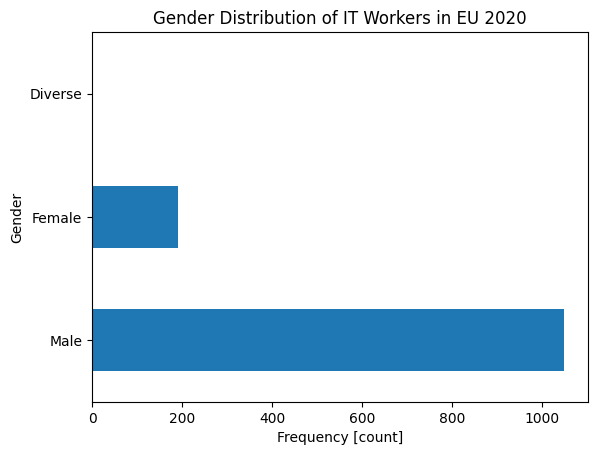

In [ ]:
df1["gender"].value_counts().plot(kind="barh", xlabel= "Frequency [count]", ylabel="Gender", title="Gender Distribution of IT Workers in EU 2020")

### City

In [ ]:
df1["city"].value_counts(normalize=True).head(20)

Berlin         0.543496
Munich         0.188348
Frankfurt      0.035116
Hamburg        0.031923
Stuttgart      0.020750
Cologne        0.015962
Amsterdam      0.007183
Stuttgart      0.005587
Prague         0.004789
Karlsruhe      0.004789
Moscow         0.004789
Düsseldorf     0.004789
Stockholm      0.003990
Zurich         0.003990
London         0.003990
Düsseldorf     0.003192
Helsinki       0.003192
Nürnberg       0.003192
Heidelberg     0.003192
Darmstadt      0.002394
Name: city, dtype: float64

Most of the participants are from Germany with the cities in Germany having most participants. Half of the respondents are from Berlin. 

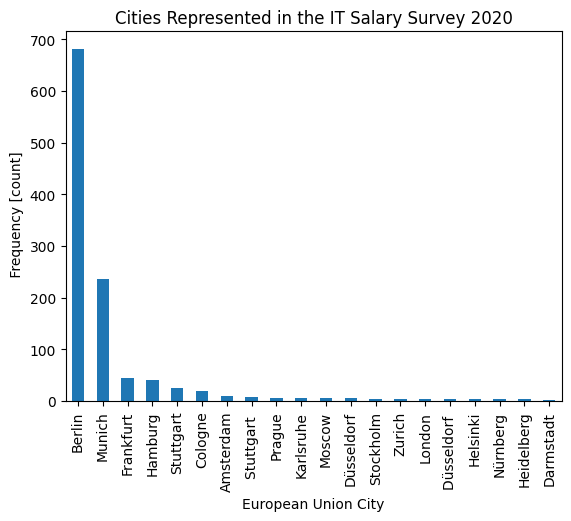

In [ ]:
df1["city"].value_counts().head(20).plot(kind = "bar", xlabel= "European Union City", ylabel=" Frequency [count]", title= "Cities Represented in the IT Salary Survey 2020");

### Job Position

In [ ]:

(df1["position"].value_counts(normalize=True)*100).head(20)

Software Engineer      31.034483
Backend Developer      13.953488
Data Scientist          8.821171
Frontend Developer      7.137129
QA Engineer             5.693665
DevOps                  4.570970
Mobile Developer        4.250200
ML Engineer             3.368083
Product Manager         3.127506
Data Engineer           2.004812
Designer (UI/UX)        1.283079
Engineering Manager     0.801925
Data Analyst            0.641540
CTO                     0.400962
SRE                     0.320770
Fullstack Developer     0.320770
Project Manager         0.320770
Software Architect      0.320770
Team Lead               0.240577
Hardware Engineer       0.240577
Name: position, dtype: float64


The common IT jobs of the participants were Software Engineers`( 31 % )`, Backend Developers `(14 %)` , Data Scientist `(9 %)` and Frontend Developer `(7 %)` .

### Seniority  Level

In [ ]:
df1["employee_level"].value_counts().head(10)


Senior             565
Middle             366
Lead               166
Junior              79
Head                44
Principal            3
student              1
Intern               1
Entry level          1
Working Student      1
Name: employee_level, dtype: int64

The survey has a composition of IT Practitioners most in the upper hierarchy in their companies. We can take a deeper look to check if their is an association of Age and Seniority level.

In [ ]:
df1["age"].groupby(df1["employee_level"]).value_counts().sort_values(ascending=False).head(20)

employee_level  age 
Senior          30.0    54
                33.0    53
                32.0    50
                35.0    47
                34.0    42
                31.0    41
Middle          28.0    37
                29.0    37
Senior          29.0    36
Middle          26.0    36
                30.0    35
Senior          28.0    33
Middle          27.0    30
Senior          36.0    26
Middle          31.0    26
Senior          37.0    24
Middle          25.0    23
Senior          38.0    23
Middle          33.0    22
Lead            34.0    20
Name: age, dtype: int64

We can see most of the participants in the age group `(30-35)` holds the most senior positions in the respective roles.

In [ ]:
df1["vacation_days"].convert_dtypes(infer_objects=False)

0               30
1               28
2               30
3               24
4               29
           ...    
1248            26
1249    unlimited 
1250            28
1251            27
1252            30
Name: vacation_days, Length: 1253, dtype: string